# Customer Churn Analysis

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [127]:
df=pd.read_csv('Customer_Churn_Analysis.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


From above dataset, we can observe there are mixed datatypes in the given dataset.

In [128]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
df.shape

(7043, 21)

This dataset has 7043 rows and 21 columns.

In [130]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

This dataset has object, integer and float type data.

In [131]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see most of the data is of object type.

In [133]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can observe following things from above statistics:

- Skewness presence is possible when the difference between 75% and max is considerably high.

- Also, Skewness might be present when std is higher than mean.

- SeniorCitizen and TotalCharges columns might possibly have outliers and skewness

In [134]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Checking the columns for the target variable.

In [135]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

CustomerID has 7043 unique values which is 100% so it would be efficient to drop these columns for better model performance.

In [136]:
df=df.drop(columns = ['customerID'], axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis

### Analyzing data with more unique value

In [137]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

Converted the TotalCharges column into Numeric data type as it was object datatype.

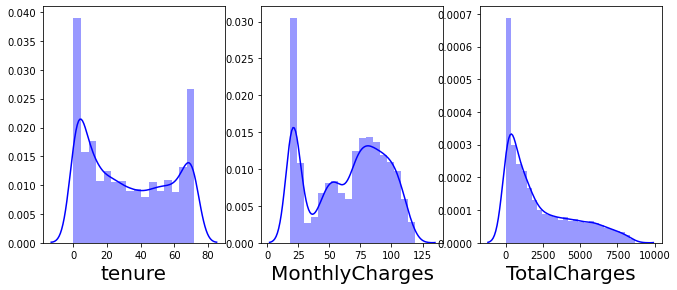

In [138]:
plt.figure(figsize = (15,20), facecolor='white')
plot_number = 1
for i in df[['tenure', 'MonthlyCharges', 'TotalCharges']]:
    if plot_number <=35:
        plt.subplot(4,4,plot_number)
        sns.distplot(df[i], color = 'blue')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

As we can see the TotalCharges column is skewed.

In [139]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

Totalcharges Column data has skewness, i.e out of -0.50 to +0.50 Range

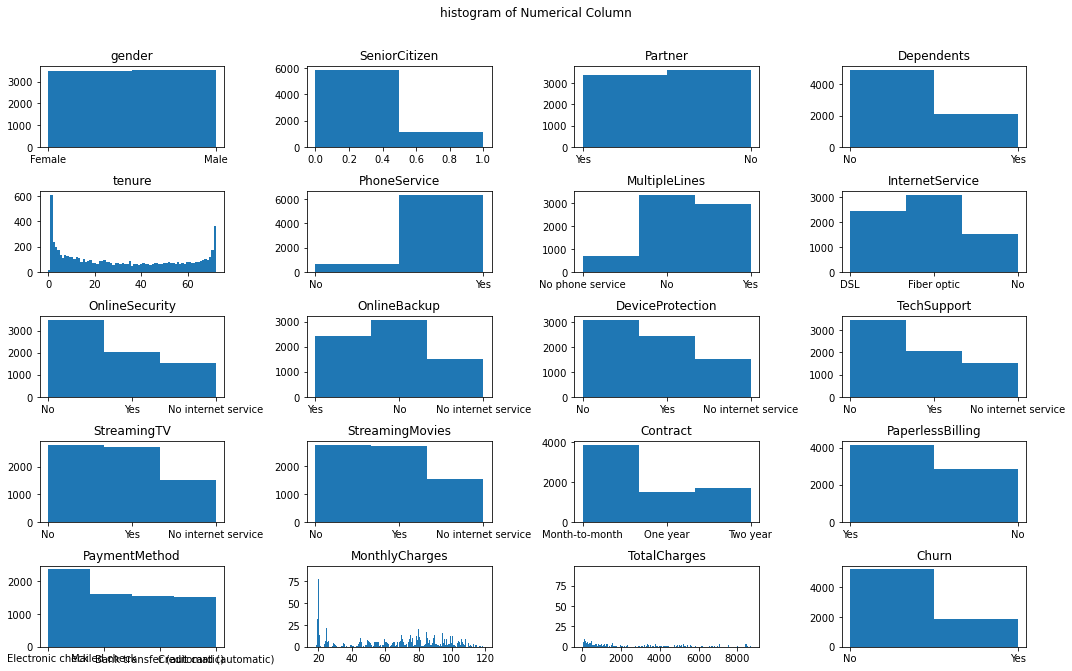

In [140]:
#histograms
plt.figure(figsize=(15, 15))
plt.suptitle("histogram of Numerical Column")
for i in range(1, df.shape[1]+1):
  plt.subplot(8, 4, i)
  f= plt.gca()
  f.set_title(df.columns[i-1])

  val= np.size(df.iloc[:, i-1].unique())
  plt.hist(df.iloc[:, i-1], bins= val)
plt.tight_layout(rect= [0, 0.03, 1, 0.95])

Observations:

- Target Variable 'Churn' has 2 unique values. Majority of the Churn data is No.

- Majority of the customer are Male. There is no much difference in gender count as well.

- Majority of the customers not Senior Citizens.

- Majority of the customers have partner and also there is not larger difference under this column data types.

- Majority of the customers doesnt have dependents.

- Majority of the customers are with PhoneService.

- Majority of the customers has Paperless Billing.

- Majority of the customers has no Multiple Lines followed by having Multiple Lines and least are with no phone service.

- Majority of the customers has Fiber optic Internet Service followed by DSL and least are with no Internet Service.

- Majority of the customers doesnt have Online Security followed by customers with online security and least are with no Internet Service.

- Majority of the customers doesnt have/ use Online Backup service followed by customers with online Backup service and least are with no Internet Service.

- Majority of the customers doesnt have/ use Device Protection service followed by customers with Device Protection service and least are with no Internet Service.

- Majority of the customers doesnt have/ use Technical Support service followed by customers using Tech Support service and least are with no Internet Service.

- Majority of the customers doesnt have/ use Streaming TV service followed by customers using Streaming TV service and least are with no Internet Service.

- Majority of the customers are under Month-to-month contract followed by two year contract and least are under one year contract.

- Majority of the customers use Electronic check as PaymentMethod followed by Mailed check and Bank transfer (automatic) payment methods and least are through Credit card (automatic).

### Analyzing the relationship with independent and dependent variable

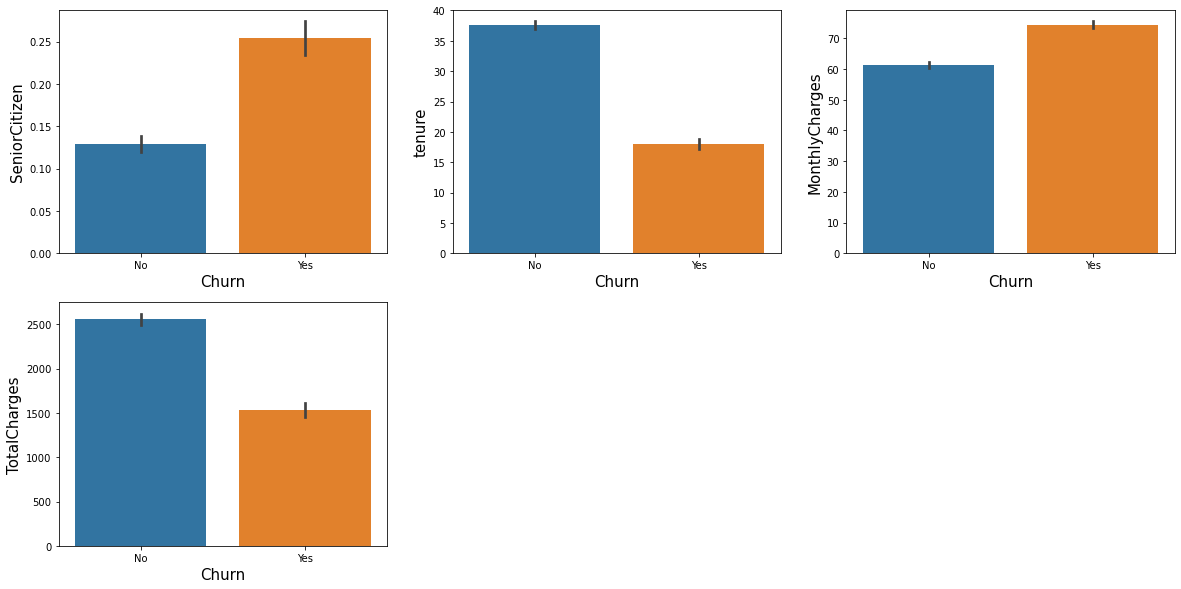

In [141]:
plt.figure(figsize=(20,26),facecolor='white')
plot_number=1
x_plot = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
y_plot = df['Churn']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('Churn',fontsize=15)
        plt.ylabel(i,fontsize=15)
    plot_number+=1
plt.show()


From BOVE, we can observe the following details:

- SeniorCitizens Customers has higher Churn rate (attrition rate).

- Less tenure customers has higher Churn rate (attrition rate).

- Customers with Monthly Charges greater than 60 has higher Churn rate (attrition rate).

- Lower Total Charges paid customers has higher Churn rate (attrition rate).

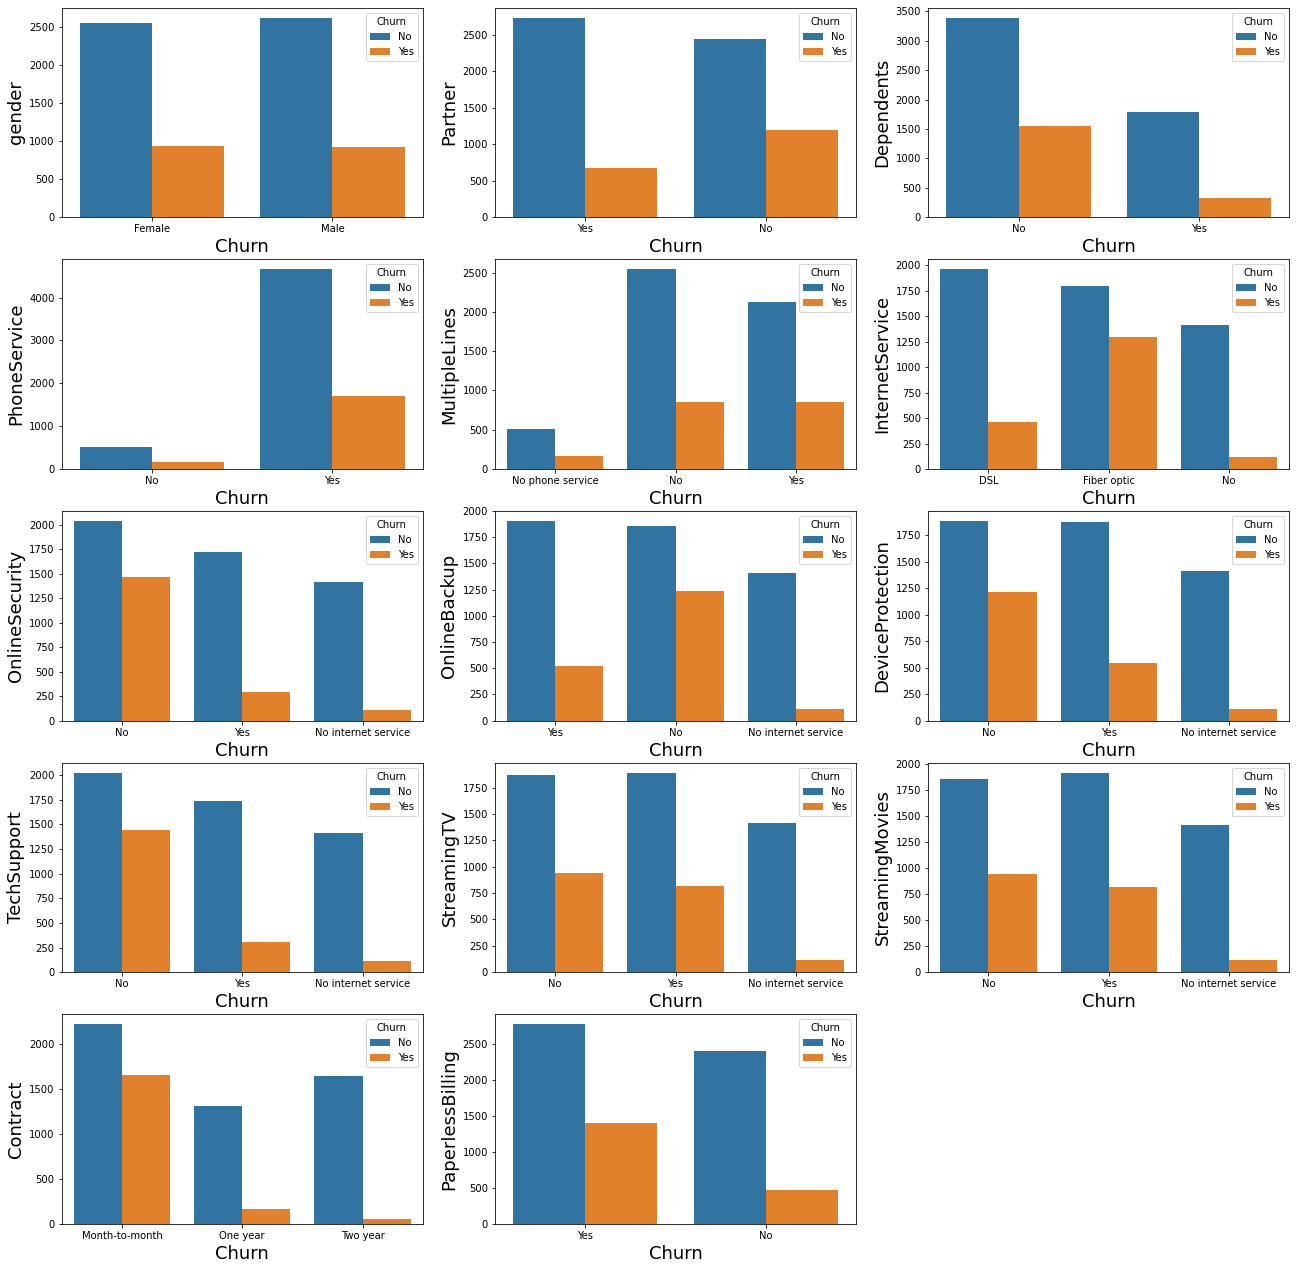

In [142]:
plt.figure(figsize=(22,27),facecolor='white')
plot_number=1
x_plot = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
             'Contract', 'PaperlessBilling']]
y_plot = df['Churn']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        plt.subplot(6,3,plot_number)
        sns.countplot(x_plot[i], hue=y_plot)
        plt.xlabel('Churn',fontsize=18)
        plt.ylabel(i,fontsize=18)
    plot_number+=1
plt.show()

From the above graph, we can observe following details:

- PaperlessBilling - Customers who use paperless billing has higher Churn rate
- gender - There is no much difference in the Churn rate with respect to Gender.
- Partner - Customers who doesnt have partner are having higher Churn rate
- Dependents - Customers who doesnt have any dependents are having higher Churn rate
- PhoneService - Customers who use Phone services has higher Churn rate
- MultipleLines - Churn rate is almost same for the customers with and without Multiple Lines
- InternetService - Customers who use Fiber optics based internet service has higher Churn rate
- OnlineSecurity - Customers who doesnt have/ use online security service are having higher Churn rate
- OnlineBackup - Customers who doesnt have/ use online backup service are having higher Churn rate
- DeviceProtection - Customers who doesnt have/ use device protection service are having higher Churn rate
- TechSupport - Customers who doesnt have/ use Tech Support service are having higher Churn rate
- StreamingTV - Customers who doesnt have/ use streaming TV service are having higher Churn rate
- StreamingMovies - Customers who doesnt have/ use streaming movies service are having higher Churn rate
- Contract - Customers who are under the contract of Month to month are having higher Churn rate.

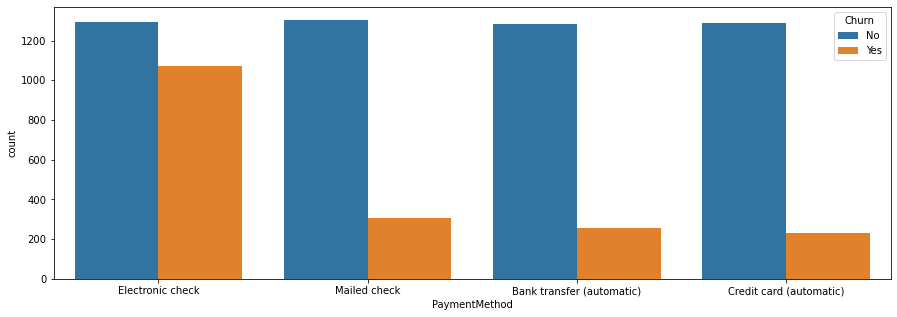

In [143]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['PaymentMethod'], hue=df['Churn'])

Customers who does payment through Electronic check has higher attrition rate / Churn rate and rest 3 payment modes customers have almost same Churn rate.

## Encoding the Categorical Data

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

In [145]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


As we can see all the columns are now in intergers.

In [146]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

Here we can see the change in the datatype

### Checking correlation

In [147]:
df.corr()
df1=df.corr()
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375556,-0.195525


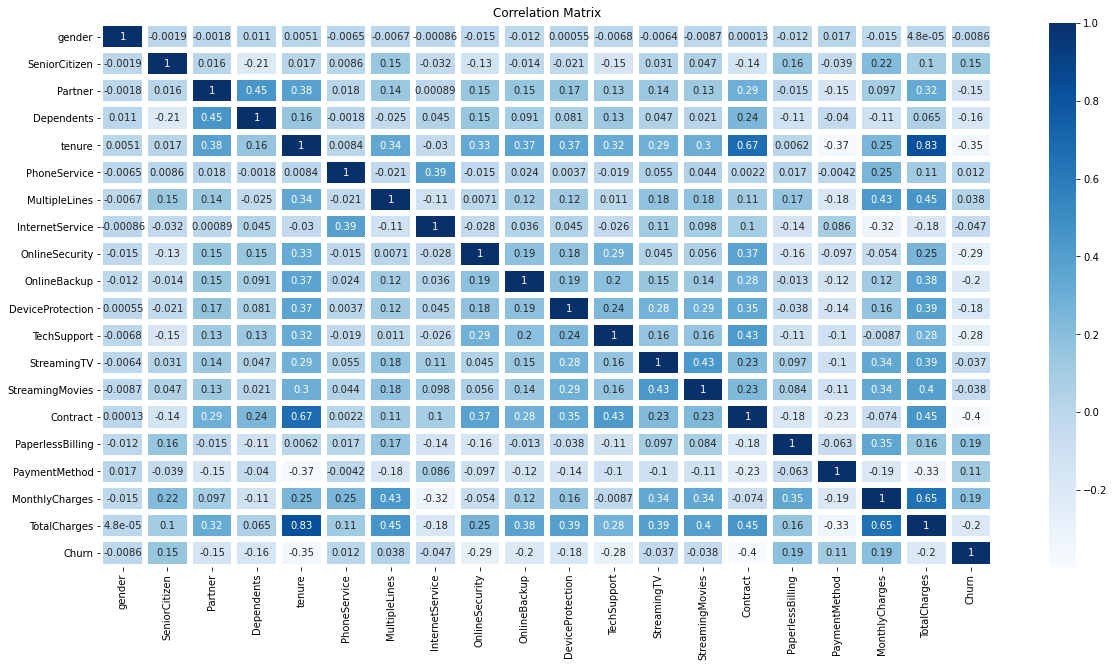

In [148]:
plt.figure(figsize=[20,10])
sns.heatmap(df1,annot=True,linewidth=5,cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

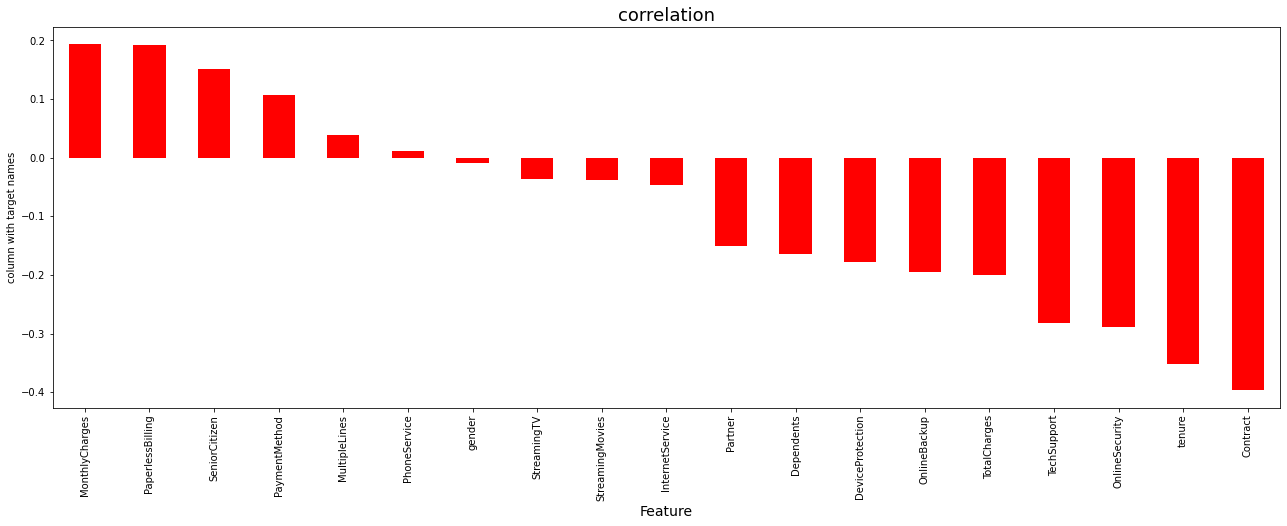

In [149]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=10)
plt.title('correlation',fontsize=18)
plt.show()

In [150]:
df1["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199484
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Using Heatmap, Correlation Matrix we can conclude that prediction done earlier is almost true.

- MonthlyCharges, paperlessBilling, SeniorCitizen are the positively correlated Column with Churn Column data
- Contract, tenure, OnlineSecurity, TechSupport are the negatively correlated Column with Churn Column data.
- Gender and PhoneService are the least correlated column data. We can drop these columns if required at later stages for better Model Prediction

### Checking for outliers

In [151]:
x = df.drop(columns=['Churn'])
y = df['Churn']
x1=x.copy()
x1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


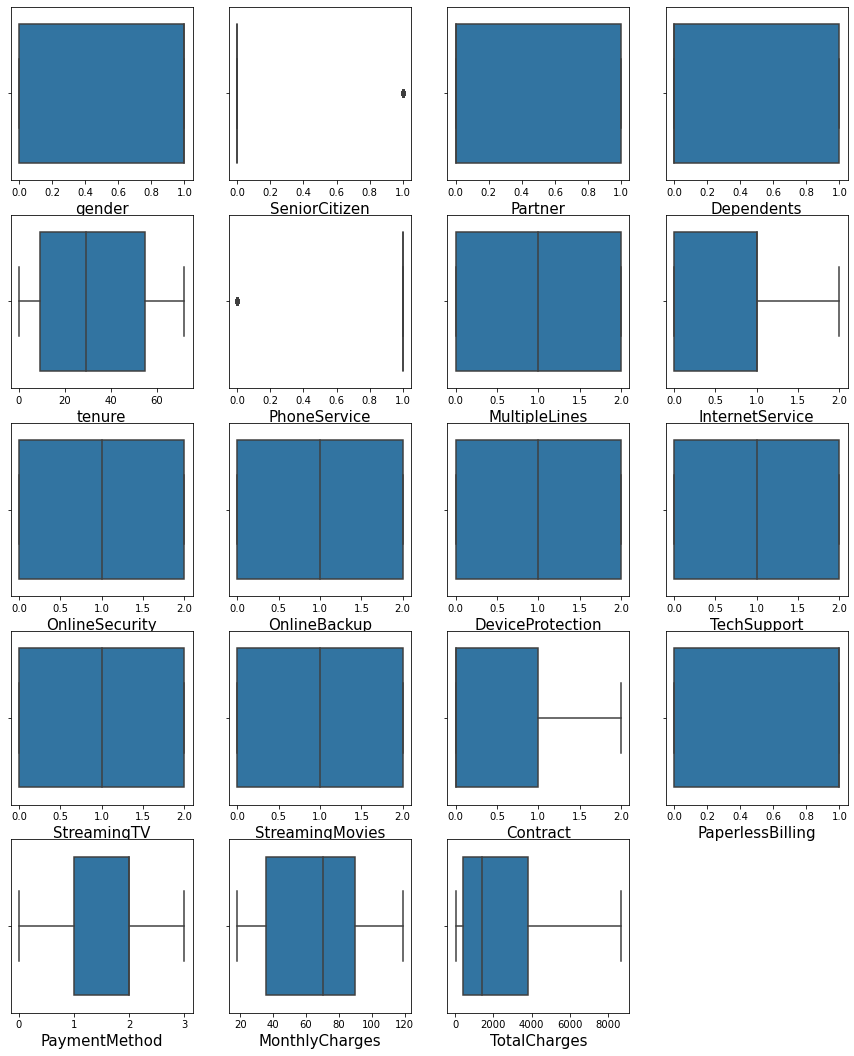

In [152]:
plt.figure(figsize=(15,30),facecolor='white')
plot_number3=1
for i in x1:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x1[i])
        plt.xlabel(i,fontsize=15)
    plot_number3+=1
plt.show()

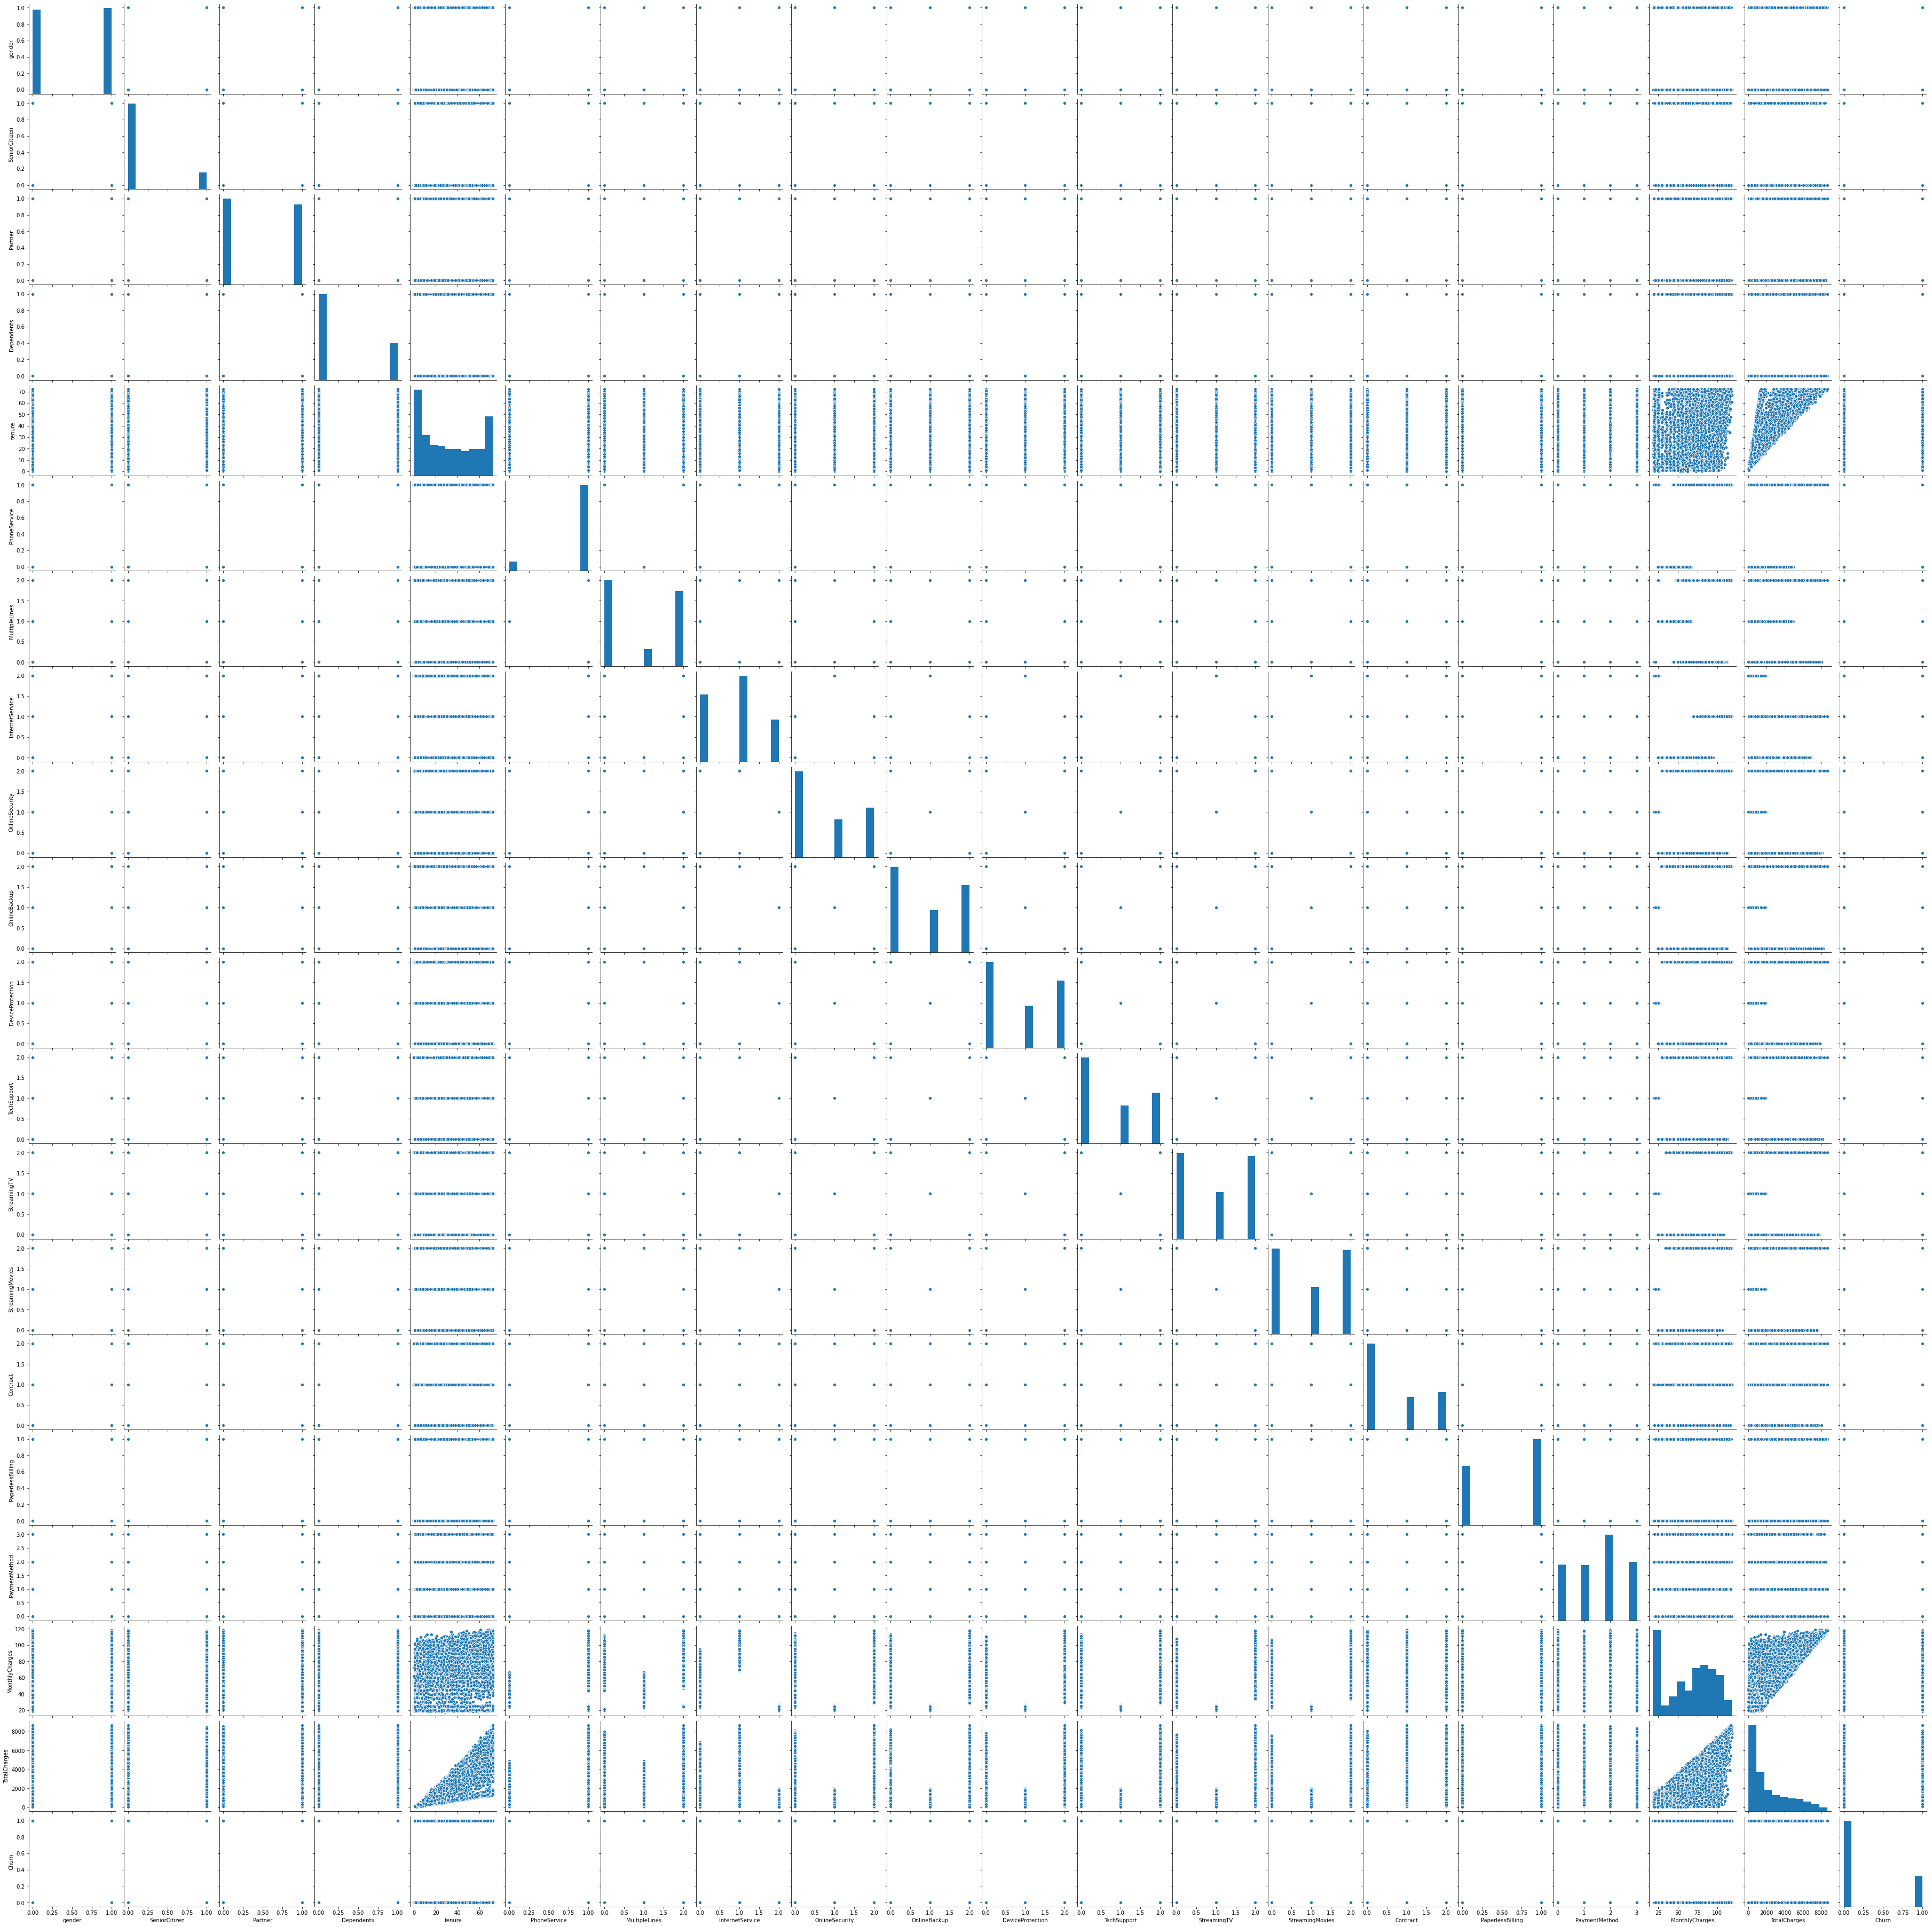

In [153]:
sns.pairplot(df)

As we can see that there are no outliers in the dataset.

In [197]:
df_cbrt = df.copy()
df_cbrt

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,3700,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,6304,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,1265,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1157,1


In [198]:
x2 = df_cbrt.drop(columns=['Churn'])
y = df_cbrt['Churn']
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [199]:
x2[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.058541
dtype: float64

As we can see that "Total Charges has skewness 0.96 which is not in the range of -0.5 to +0.5.

In [200]:
x2=x[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [201]:
for index in x2.skew().index:
    if x2.skew().loc[index] >0.50:
        x2[index]=np.cbrt( x2[index])

In [202]:
x2.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.012819
dtype: float64

As we can see here that the skewness for "Total Charges" is now in the range of -0.50 to +0.50.

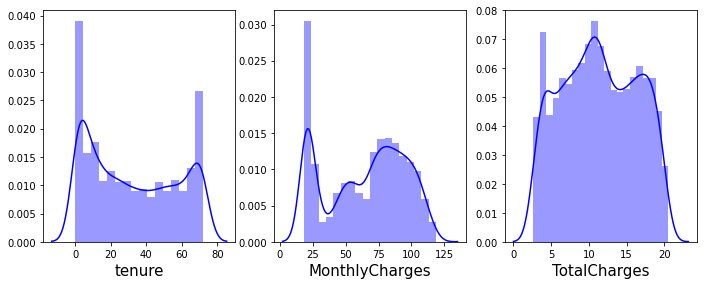

In [203]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x2:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x2[i], color = 'blue')
        plt.xlabel(i,fontsize = 15)
    plot_number+=1
plt.show()

### Merging Corrected Skewness Data Set

In [204]:
drop_index = df.index.difference(x2.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(7043, 20)

### Seperating into Target and Feature Columns

In [205]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])
x2 = df.drop(columns=['Churn'])
y = df['Churn']
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [206]:
x2.shape

(7043, 19)

## Selecting KBest Features

### With KBest we will figure which feature has least score and it will help us to decide which columns to drop before model building

In [207]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func = f_classif, k = 17)
best_fit = best_features.fit(x2,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x2.columns)

In [209]:
best_fit = best_features.fit(x2,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x2.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(19,'Scores'))

            Features       Scores
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
18      TotalCharges   400.068580
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674
5       PhoneService     1.004266
0             gender     0.522257


Upon reviewing Best Features Scores, found gender has the least score and dropping TotalCharges. Gender columns has the less correlationship with target variable. So dropping these 2 columns for better accuracy

In [214]:
x_best = x2.drop(columns=['gender', 'TotalCharges']).copy()

In [215]:
x_best

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


## Model Bulding: Classification Problem

### Finding the best random state

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size = .33, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8206451612903226 on random_state: 24


In [219]:
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size = .33, random_state = maxRS)

### Logistic Regression Model

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score as cv
lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cv_lrc=cv(lrc,x2,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)


In [226]:
confusion_matrix_lrc

array([[1583,  161],
       [ 262,  319]], dtype=int64)

In [227]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1744
           1       0.66      0.55      0.60       581

    accuracy                           0.82      2325
   macro avg       0.76      0.73      0.74      2325
weighted avg       0.81      0.82      0.81      2325



In [234]:
print(cv_lrc)

0.8042030937479836


In [235]:
print(roc_lrc)

0.728368421260402


Difference= 82-72.83 = 9.17

### Random Forest Classifier

In [236]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cv_rfc=cv(rfc,x2,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)


In [237]:
confusion_matrix_rfc

array([[1601,  143],
       [ 286,  295]], dtype=int64)

In [238]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1744
           1       0.67      0.51      0.58       581

    accuracy                           0.82      2325
   macro avg       0.76      0.71      0.73      2325
weighted avg       0.80      0.82      0.81      2325



In [239]:
print(cv_rfc)

0.7918523977353378


In [240]:
print(roc_rfc)

0.7128749269686875


difference= 82-79.18 = 2.82

### Decision Tree Classifier

In [242]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cv_dtc=cv(dtc,x2,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)


In [243]:
confusion_matrix_dtc

array([[1393,  351],
       [ 265,  316]], dtype=int64)

In [244]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1744
           1       0.47      0.54      0.51       581

    accuracy                           0.74      2325
   macro avg       0.66      0.67      0.66      2325
weighted avg       0.75      0.74      0.74      2325



In [245]:
print(cv_dtc)

0.7252580811665269


In [246]:
print(roc_dtc)

0.6713141886023781


Difference= 74-72.25 = 1.75

### Support Vector Classifier

In [248]:
from sklearn.svm import SVC
sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cv_sv=cv(sv,x2,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

In [249]:
confusion_matrix_sv

array([[1744,    0],
       [ 581,    0]], dtype=int64)

In [250]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1744
           1       0.00      0.00      0.00       581

    accuracy                           0.75      2325
   macro avg       0.38      0.50      0.43      2325
weighted avg       0.56      0.75      0.64      2325



In [251]:
print(cv_sv)

0.7346301575908123


In [252]:
print(roc_sv)

0.5


Difference = 75-73.45 = 1.55

### KNeighbors Classifier

In [253]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cv_knn=cv(knn,x2,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

In [254]:
confusion_matrix_knn

array([[1536,  208],
       [ 338,  243]], dtype=int64)

In [255]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1744
           1       0.54      0.42      0.47       581

    accuracy                           0.77      2325
   macro avg       0.68      0.65      0.66      2325
weighted avg       0.75      0.77      0.75      2325



In [256]:
print(cv_knn)

0.7597602063036325


In [257]:
print(roc_knn)

0.6494891755751709


Difference = 77 - 76 = 1

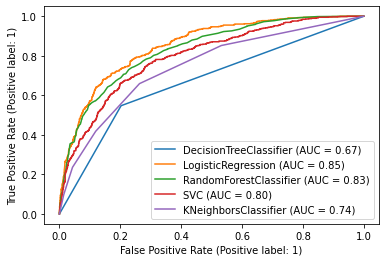

In [258]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, KNN Classifier Model ranks with least difference. However, Logistic regression has best AUC score compared to SVC, DTC and KNN method but difference is way too high but we will choose Random Forest Classifier as Best Model and proceeding with Hyper Paramater tuning.

### Hyper Parameter Tuning Using Grid Search

### Defining the Parameters list for Random Forest Classifier

In [259]:
parameters = {'ccp_alpha': np.array([0.5,0.05,0.005,0.0005,1,0.1,0.01]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,150],
             'max_features': ["auto","sqrt"]}

In [261]:
from sklearn.model_selection import GridSearchCV
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [262]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 150],
                         'max_features': ['auto', 'sqrt']},
             verbose=2)

In [263]:
GridCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0005,
 'criterion': 'gini',
 'max_depth': 300,
 'max_features': 'sqrt'}

### Training the selected model with best parameters.

In [265]:
Best_model = RandomForestClassifier(ccp_alpha = 0.0005, bootstrap = True, criterion = 'gini', max_depth = 300, max_features = 'sqrt')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

82.45161290322581


# We got 82.45% Accuracy for this model.

### Saving the model

In [268]:
import joblib
joblib.dump(Best_model,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']